# Hi there, Welcome. 

#### Project Completion Date: 08-Jan-2021

### Introduction:

In this notebook, I will explain all the steps that I have performed for my data analysis project with COVID-19 dataset. 

Note: All the datasets were downloaded from Coursera's guided project.

#### To do this data analysis project, I have used 3 datasets i.e, 
    1. covid19_Confirmed_dataset.csv
    2. covid19_deaths_dataset.csv
    3. worldwide_happiness_report.csv
    
#### Goal of this project: 
    1. Clean and pre-process the covid19_Confirmed_dataset and covid19_deaths_dataset individually. 
    2. Merge the above two datasets
    3. Clean and pre-process the worldwide_happiness_report dataset.
    4. Merge with the above dataset and find correlation among the data.
    5. Visualize the results using Seaborn.



#### Step 1: 
    Import all the important libraries (pandas, numpy, seaborn & matplotlib.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Modules are imported Successfully")

Modules are imported Successfully


#### Step 2:
    1. import the first dataset - covid19_Confirmed_dataset.csv
    2. Read the first 10 lines using .head(10) function
    3. To know the shape of the dataset, use, .shape method.
    4. To see the columns of the dataset, use, .columns method.

In [2]:
covid_confirmed = pd.read_csv('covid19_Confirmed_dataset.csv')

In [3]:
covid_confirmed.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


In [4]:
covid_confirmed.shape

(266, 104)

In [5]:
covid_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

#### Step 3:
    1. Now, we will delete the useless columns from our dataset to make it more compact. 
    2. For deleting, we use .drop method.
    3. axis is by default set to 0, which means it considers row. However, for it to consider columns, we need to change the value of axis from 0 to 1.
    4. If we set the inplace parameter as 'True' then it will delete the unwanted columns from the main dataset. 
    5. Note: While assigning the drop method output to another dataframe, there is no need to mention the parameter, 'inplace'.

In [6]:
covid_confirmed.drop(['Lat', 'Long'], axis=1, inplace=True)
covid_confirmed.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Step 4:
    1. We will use .groupby() and .sum() to get the aggregate of the dataset. 
    2. This step is used to compact the size of the dataset for our analysis.
    3. We will then change the index to 'Country/Region', to make it easy for us to conduct further data analysis steps without any hassle.
    

In [7]:
covid_confirmed_aggregate = covid_confirmed.groupby('Country/Region').sum()

In [8]:
covid_confirmed_aggregate.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
covid_confirmed_aggregate.shape

(187, 100)

#### Step 5:
    1. We will measure first derivative for each country individually using for loop. Then we will add a new column which denotes maxima with the name, 'max_infection_rate'. 
    
    Note: A derivative is simply a measure of the rate of change. It can be the rate of change of distance with respect to time or the temperature with respect to distance. We want to measure the rate of change of a function y = f(x)y=f(x) with respect to its variable xx.

In [10]:
countries = list(covid_confirmed_aggregate.index)
max_infection_rate = []

for c in countries:
    max_infection_rate.append(covid_confirmed_aggregate.loc[c].diff().max())

covid_confirmed_aggregate['max_infection_rate'] = max_infection_rate

covid_confirmed_aggregate.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


#### Step 6:
   Create a new dataframe with only essential columns
    

In [11]:
covid_dataset_01 = pd.DataFrame(covid_confirmed_aggregate['max_infection_rate'])

In [14]:
covid_dataset_01.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


#### Step 7: Perform all the above steps for the next dataset i.e., covid19_deaths_dataset. Only difference will be, instead of max_infection_rate, we will create a column, 'max_death_rate'

In [15]:
covid_deaths = pd.read_csv('covid19_deaths_dataset.csv')

In [16]:
covid_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [17]:
covid_deaths.drop(['Lat', 'Long'], axis=1, inplace=True)

In [18]:
covid_deaths.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [19]:
covid_deaths.set_index('Country/Region')

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,NaN,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,NaN,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,NaN,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,NaN,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sao Tome and Principe,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [20]:
covid_deaths_aggregate = covid_deaths.groupby('Country/Region').sum()

In [21]:
covid_deaths_aggregate.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [22]:
covid_deaths_aggregate.shape

(187, 100)

In [23]:
countries = list(covid_deaths_aggregate.index)
max_death_rate = []

for c in countries:
    max_death_rate.append(covid_deaths_aggregate.loc[c].diff().max())

covid_deaths_aggregate['max_death_rate'] = max_death_rate

covid_deaths_aggregate.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


In [26]:
covid_dataset_02 = pd.DataFrame(covid_deaths_aggregate['max_death_rate'])

In [27]:
covid_dataset_02

,max_death_rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0
...,...
West Bank and Gaza,1.0
Western Sahara,0.0
Yemen,2.0


#### Step 8:
Join both the dataframes i.e. covid_dataset_01 and covid_dataset_02 using .join method

In [28]:
covid_dataset = covid_dataset_01.join(covid_dataset_02, how='inner')

In [29]:
covid_dataset.head()

,max_infection_rate,max_death_rate
Country/Region,,
Afghanistan,232.0,7.0
Albania,34.0,4.0
Algeria,199.0,30.0
Andorra,43.0,4.0
Angola,5.0,2.0


#### Step 9: 

Check the correlation between max_infection_rate and max_death_rate

In [30]:
covid_dataset.corr()

,max_infection_rate,max_death_rate
max_infection_rate,1.000000,0.937685
max_death_rate,0.937685,1.000000


#### Step 10:
1. Import the third dataset, "worldwide_happiness_report.csv"
2. Delete unnecessary columns
3. merge with the covid_dataset dataframe
4. visualize using seaborn

In [47]:
happiness_data = pd.read_csv('worldwide_happiness_report.csv')

In [48]:
happiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### Note: We are going to delete the following columns because of the following reasons:

1. Overall rank: This column will be removed because it will not give us any new insight.
2. Score: This column will be removed because it isn't related at this point of time.
3. Generosity: will be removed because, we do not need how generous people of a country are because that is not our concern at this point of time. 
4. Perceptions of corruption will not matter because our concern is about how covid spread is happening. 

We will keep rest of the columns intact. 

In [49]:
happiness_data.shape

(156, 9)

In [50]:
no_use = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']
happiness_data.drop(no_use, axis=1, inplace=True)

In [60]:
happiness_data.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [63]:
happiness_data.set_index('Country or region', inplace=True)

In [64]:
happiness_data.shape

(156, 4)

In [65]:
happiness_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [66]:
merged_data = covid_dataset.join(happiness_data, how='inner')

In [67]:
merged_data.head()

,max_infection_rate,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,7.0,0.350,0.517,0.361,0.000
Albania,34.0,4.0,0.947,0.848,0.874,0.383
Algeria,199.0,30.0,1.002,1.160,0.785,0.086
Argentina,291.0,13.0,1.092,1.432,0.881,0.471
Armenia,134.0,3.0,0.850,1.055,0.815,0.283


### Note: Correlation Matrix and their meaning

##### Correlation Strength = Perfect
        positive range = 0.9 to 1.0
        negative range = -0.9 to -1.0
##### Correlation Strength = Strong
        positive range = 0.5 to 0.9
        negative range = -0.5 to -0.9
##### Correlation Strength = Weak
        positive range = 0.1 to 0.5
        negative range = -0.1 to -0.5
##### Correlation Strength = Unrelated
        positive range = 0.0 to 0.1
        negative range = 0.0 to -0.1
        
##### Any correlation value above 0.3 and below -0.3 is considered significant

In [68]:
merged_data.corr()

,max_infection_rate,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.880597,0.250118,0.191958,0.289263,0.078196
max_death_rate,0.880597,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.250118,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.080166,0.394603,0.456246,0.427892,1.000000


### As per the above inference, the features that are unrelated are,

1. max_infection_rate Vs GDP per capita
2. max_death_rate Vs GDP per capita
3. max_infection_rate Vs Social support
4. max_death_rate Vs Social support
5. max_infection_rate Vs Healthy life expectancy
6. max_infection_rate Vs Freedom to make life choices
7. max_death_rate Vs Freedom to make life choices

### The features that are related,

1. GDP per capita Vs Healthy life expectancy (STRONG)
2. GDP per capita Vs Freedom to make life choices (WEAK)
3. GDP per capita Vs Social support (STRONG)
4. max_infection_rate Vs max_death_rate (STRONG)
5. Healthy life expectancy Vs Freedom to make life choices (WEAK)
6. Healthy life expectancy Vs max_death_rate (WEAK)
7. Healthy life expectancy Vs Social support (STRONG)
8. Freedom to make life choices Vs Social support (WEAK)

#### Step 11:
We have come to the last step of this data analysis project i.e. visualization using seaborn.(ONLY FEATURES THAT HAVE STRONG CORRELATION COEFFICIENT)

### Max_infection_rate Vs Max_death_rate

C:\Users\abith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


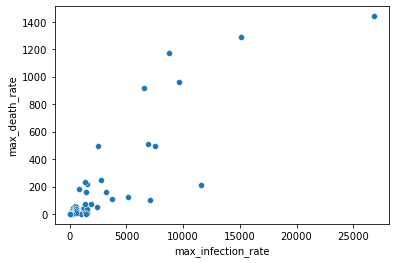

In [69]:
x_max_infection = merged_data['max_infection_rate']
y_max_death = merged_data['max_death_rate']
sns.scatterplot(x_max_infection, y_max_death)

C:\Users\abith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


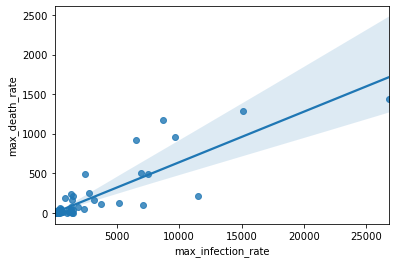

In [70]:
sns.regplot(x_max_infection, y_max_death)

### GDP per capita Vs Social support

C:\Users\abith\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\abith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


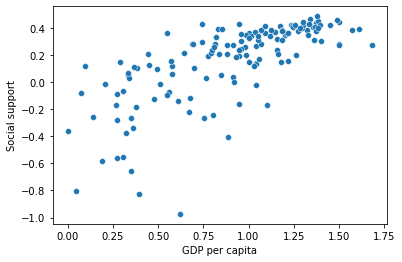

In [76]:
x_GDP = merged_data['GDP per capita']
y_social = merged_data['Social support']
sns.scatterplot(x_GDP, np.log(y_social))

C:\Users\abith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


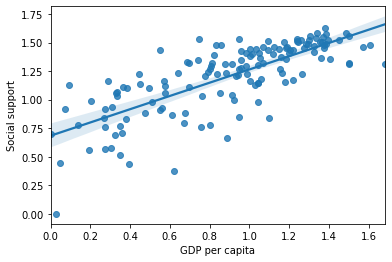

In [78]:
sns.regplot(x_GDP, y_social)

### GDP per capita Vs Healthy life expectancy

C:\Users\abith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


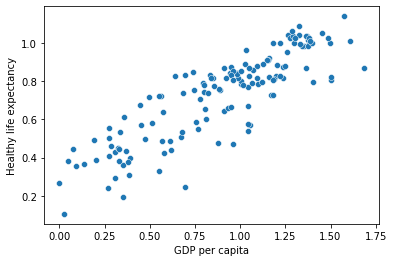

In [79]:
x_GDP = merged_data['GDP per capita']
y_hea = merged_data['Healthy life expectancy']
sns.scatterplot(x_GDP, y_hea)

C:\Users\abith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


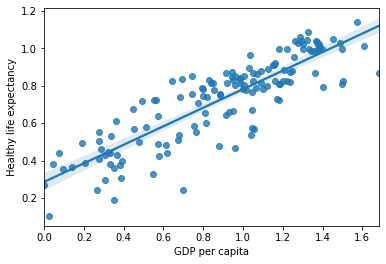

In [81]:
sns.regplot(x_GDP, y_hea)

### Healthy life expectancy vs Social support

C:\Users\abith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


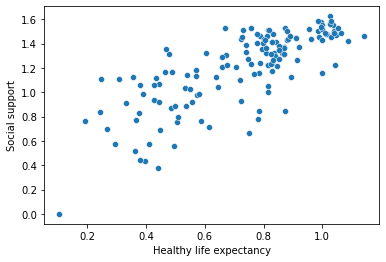

In [82]:
x_hea = merged_data['Healthy life expectancy']
y_social = merged_data['Social support']

sns.scatterplot(x_hea, y_social)

C:\Users\abith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


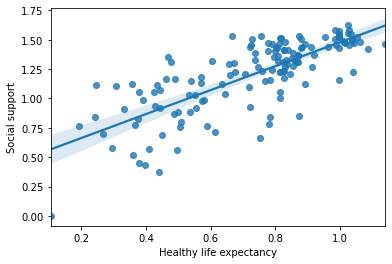

In [83]:
sns.regplot(x_hea, y_social)